In [ ]:
## Felicity Le section C

DS 256 Data Science Programming, Fall 2024

Prof Eatai Roth

## Problem Set 5
Due 11/14/2024 by 8p

## Titanic Pandas
(sounds cute...is not)

In this assignment, we'll explore the titanic training data set. These data represent a portion of the passenger manifest of the Titanic, detailing the passengers and whether or not they survived the fateful crash.

The columns are mostly self-explanatory. Key to less-obvious columns:
 - Sex - male=1 / female=0 
 - Parch - number of parents/children traveling with
 - SibSp - numbers of siblings/spouses traveling with
 - PClass - ticket class (like first class, business, economy)


 To start, you should import packages, ```pandas``` (as pd) and ```matplotlib.pyplot``` (as plt). Then load the data from ```titanic_train_clean.csv``` into a pandas dataframe.

 Feel free to add more code blocks if needed. When making figures, don't forget to label axes and provide titles and legends when appropriate.

In [3]:
# Add the boilerplate code for importing the required packages and data
# Importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the Titanic dataset into a pandas dataframe
df = pd.read_csv('titanic.csv')

# Display the first few rows of the dataframe to check the data
df.head()

# Get basic information about the dataset
df.info()

# Display basic statistics about numeric columns
df.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          891 non-null    float64
 1   Cabin        204 non-null    object 
 2   Embarked     891 non-null    object 
 3   Fare         891 non-null    float64
 4   Name         891 non-null    object 
 5   Parch        891 non-null    int64  
 6   PassengerId  891 non-null    int64  
 7   Pclass       891 non-null    int64  
 8   Sex          891 non-null    int64  
 9   SibSp        891 non-null    int64  
 10  Survived     891 non-null    int64  
 11  Ticket       891 non-null    object 
 12  Title        891 non-null    object 
 13  Family_Size  891 non-null    int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 97.6+ KB


,Age,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Family_Size
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,29.445196,32.204208,0.381594,446.000000,2.308642,0.647587,0.523008,0.383838,0.904602
std,13.244896,49.693429,0.806057,257.353842,0.836071,0.477990,1.102743,0.486592,1.613459
min,0.420000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,7.910400,0.000000,223.500000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,30.000000,14.454200,0.000000,446.000000,3.000000,1.000000,0.000000,0.000000,0.000000
75%,35.500000,31.000000,0.000000,668.500000,3.000000,1.000000,1.000000,1.000000,1.000000
max,80.000000,512.329200,6.000000,891.000000,3.000000,1.000000,8.000000,1.000000,10.000000


## Homework Problems

For each of the problems, you'll write some code to find the answer. If there is a written/short answer component, use the provided text field.

### Problem 1

 - How many passengers are recorded in this log?
 - What percentage are male?
 - What percentage survived?

Hint: You can find these three answers with a single command.

In [5]:
'''your code here'''
# Number of passengers
num_passengers = len(df)

# Percentage of male passengers (assuming 'Sex' column has 1 for male and 0 for female)
percentage_male = df['Sex'].mean() * 100

# Percentage of passengers who survived (assuming 'Survived' column has 1 for survived and 0 for did not survive)
percentage_survived = df['Survived'].mean() * 100

# Display results
print(f"Number of passengers: {num_passengers}")
print(f"Percentage of male passengers: {percentage_male:.2f}%")
print(f"Percentage of passengers who survived: {percentage_survived:.2f}%")


Number of passengers: 891
Percentage of male passengers: 64.76%
Percentage of passengers who survived: 38.38%


Your written answer:

 - <Answer 1>
 - <Answer 2>
 - <Answer 3>

### Problem 2:

 - What percentage of female passengers survived?
 - What percentage of male passengers survived?

In [7]:
'''your code here'''
# Percentage of female passengers who survived
percentage_female_survived = df[df['Sex'] == 0]['Survived'].mean() * 100

# Percentage of male passengers who survived
percentage_male_survived = df[df['Sex'] == 1]['Survived'].mean() * 100

# Display results
print(f"Percentage of female passengers who survived: {percentage_female_survived:.2f}%")
print(f"Percentage of male passengers who survived: {percentage_male_survived:.2f}%")

Percentage of female passengers who survived: 74.20%
Percentage of male passengers who survived: 18.89%


Your written answer:

 - <Answer 1>
 - <Answer 2>

### Problem 3

Use ```groupby``` and ```agg``` to find the percentage of the total tickets and the survivorship percentage for each class of ticket.

In [13]:
'''your code here'''
# Group by Pclass and aggregate the percentage of tickets and survivorship percentage
ticket_and_survival = df.groupby('Pclass').agg(
    total_tickets=('Pclass', 'size'),  # Count of tickets for each class
    survivorship_percentage=('Survived', 'mean')  # Mean survival rate for each class
)

# Calculate percentage of total tickets
ticket_and_survival['% tickets'] = (ticket_and_survival['total_tickets'] / num_passengers) * 100

# Calculate percentage of survivorship
ticket_and_survival['% survivorship'] = ticket_and_survival['survivorship_percentage'] * 100

# Print results in the desired format
for pclass in [1, 2, 3]:
    print(f"Class {pclass}")
    print(f"% tickets: {ticket_and_survival.loc[pclass, '% tickets']:.2f}%")
    print(f"% survivorship: {ticket_and_survival.loc[pclass, '% survivorship']:.2f}%")
    print()  # Adding a newline for better readability


Class 1
% tickets: 24.24%
% survivorship: 62.96%

Class 2
% tickets: 20.65%
% survivorship: 47.28%

Class 3
% tickets: 55.11%
% survivorship: 24.24%



Your written answer:

 - Class 1 
    - % tickets:
    - % survivorship: 
- Class 2 
    - % tickets:
    - % survivorship: 
- Class 3
    - % tickets:
    - % survivorship: 


### Problem 4

Create two new dataframes corresponding to survivors and non-survivors keeping only the columns: age, name, and sex. Display the first five rows of these new dataframes.

Create a figure showing the distribution of age by sex and survivorship (four histograms on the same axes: male-survivors, female-survivors, male-unlucky, female-unlucky). Choose colors and histtype (see the [documentation for histogram](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)) to make this figure easy to read and interpret.

Survivors DataFrame (First 5 rows):
    Age                                               Name  Sex
1  38.0  Cumings, Mrs. John Bradley (Florence Briggs Th...    0
2  26.0                             Heikkinen, Miss. Laina    0
3  35.0       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0
8  27.0  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)    0
9  14.0                Nasser, Mrs. Nicholas (Adele Achem)    0

Non-Survivors DataFrame (First 5 rows):
    Age                            Name  Sex
0  22.0         Braund, Mr. Owen Harris    1
4  35.0        Allen, Mr. William Henry    1
5  30.0                Moran, Mr. James    1
6  54.0         McCarthy, Mr. Timothy J    1
7   2.0  Palsson, Master. Gosta Leonard    1


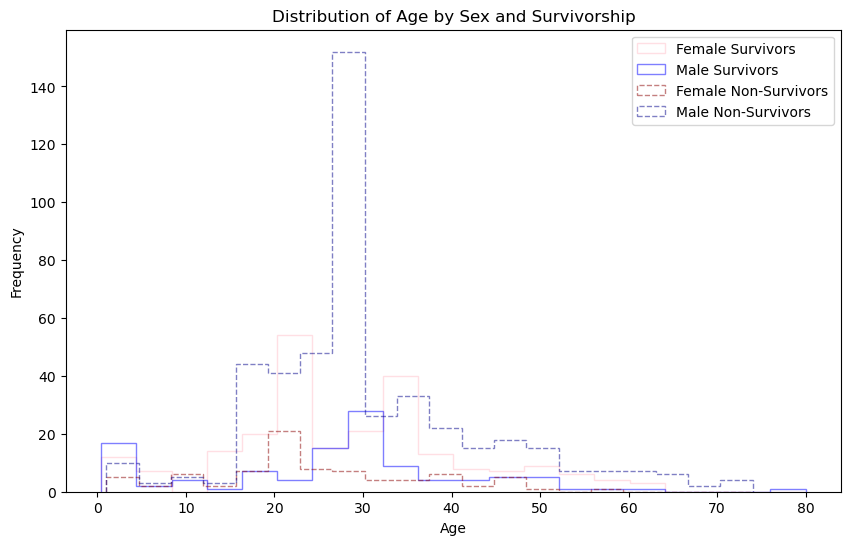

In [15]:
'''Your code here'''
# Step 1: Create dataframes for survivors and non-survivors
survivors = df[df['Survived'] == 1][['Age', 'Name', 'Sex']]
non_survivors = df[df['Survived'] == 0][['Age', 'Name', 'Sex']]

# Display the first five rows of these new dataframes
print("Survivors DataFrame (First 5 rows):")
print(survivors.head())

print("\nNon-Survivors DataFrame (First 5 rows):")
print(non_survivors.head())

# Step 2: Plot the histograms
import matplotlib.pyplot as plt

# Set up the figure and axes
plt.figure(figsize=(10, 6))

# Plot histograms
plt.hist([survivors[survivors['Sex'] == 1]['Age'], survivors[survivors['Sex'] == 0]['Age']], 
         bins=20, alpha=0.5, label=['Male Survivors', 'Female Survivors'], histtype='step', linestyle='-', color=['blue', 'pink'])
plt.hist([non_survivors[non_survivors['Sex'] == 1]['Age'], non_survivors[non_survivors['Sex'] == 0]['Age']], 
         bins=20, alpha=0.5, label=['Male Non-Survivors', 'Female Non-Survivors'], histtype='step', linestyle='--', color=['darkblue', 'darkred'])

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age by Sex and Survivorship')

# Add legend
plt.legend()

# Show the plot
plt.show()

### Problem 5

Now that we've inspected the data, let's build a classifier (you'll compare two models) that predicts which passengers survived. These are the steps you should take:

 - Choose your features. The label will be survivorship.
 - Split the data into training and test sets.
 - Standardize the values using StandardScaler
 - Choose two of the following model types: KNN, SVM, Decision Tree. Create those models and select hyper-parameters.
 - Fit your models to the training data.
 - Apply the fit models to create predictions from the test data.
 - For each model, create a confusion matrix for the training and test data. You may want to revisit the hyper-parameters and re-fit the models.

 - Answer the questions at the bottom of the code block.

In [20]:
'''Your code here'''
# Step 1: Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import pandas as pd

# Select features and label
X = df[['Age', 'Sex', 'Pclass', 'SibSp', 'Parch', 'Fare']]
X['Sex'] = X['Sex'].astype('category')  # Convert Sex to categorical variable
X = pd.get_dummies(X, drop_first=True)  # One-hot encode categorical variables

# Handle missing values (fill NaN values with the median)
X['Age'].fillna(X['Age'].median(), inplace=True)
X['Fare'].fillna(X['Fare'].median(), inplace=True)

y = df['Survived']  # Target variable (label)

# Step 2: Train and Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Standardizing Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Build Models

# KNN Model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Decision Tree Model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)

# Step 5: Evaluate Models with Confusion Matrices
# KNN Confusion Matrix (Training Data)
knn_train_preds = knn.predict(X_train_scaled)
knn_train_cm = confusion_matrix(y_train, knn_train_preds)

# KNN Confusion Matrix (Test Data)
knn_test_preds = knn.predict(X_test_scaled)
knn_test_cm = confusion_matrix(y_test, knn_test_preds)

# Decision Tree Confusion Matrix (Training Data)
dt_train_preds = dt.predict(X_train_scaled)
dt_train_cm = confusion_matrix(y_train, dt_train_preds)

# Decision Tree Confusion Matrix (Test Data)
dt_test_preds = dt.predict(X_test_scaled)
dt_test_cm = confusion_matrix(y_test, dt_test_preds)

# Print results
print("KNN Model Confusion Matrix (Training Data):")
print(knn_train_cm)
print("\nKNN Model Confusion Matrix (Test Data):")
print(knn_test_cm)

print("\nDecision Tree Model Confusion Matrix (Training Data):")
print(dt_train_cm)
print("\nDecision Tree Model Confusion Matrix (Test Data):")
print(dt_test_cm)

KNN Model Confusion Matrix (Training Data):
[[402  42]
 [ 54 214]]

KNN Model Confusion Matrix (Test Data):
[[88 17]
 [17 57]]

Decision Tree Model Confusion Matrix (Training Data):
[[443   1]
 [ 14 254]]

Decision Tree Model Confusion Matrix (Test Data):
[[86 19]
 [20 54]]


/var/folders/fp/g__8qytx5gd9bz101yt_3zvr0000gn/T/ipykernel_2185/1901629497.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex'] = X['Sex'].astype('category')  # Convert Sex to categorical variable
/var/folders/fp/g__8qytx5gd9bz101yt_3zvr0000gn/T/ipykernel_2185/1901629497.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the 

#### **Questions**

How does the model performance on the test data compare to the performance on the training data? 
 
 - KNN Model:
On training data, KNN performed well with few misclassifications. However, on test data, it struggled more, showing more false positives and negatives, indicating overfitting.

- Decision Tree Model:
On training data, the Decision Tree also performed well, but on test data, its performance dropped slightly, with a small increase in misclassifications. It still performed better than KNN on test data.


Which models did you fit and which worked better?
 
 - Models Fitted: I used KNN (K-Nearest Neighbors) and Decision Tree models.

- The Decision Tree worked better because it performed more consistently on both training and test data, while KNN showed signs of overfitting and performed worse on the test data.